<a href="https://colab.research.google.com/github/basangoudapatil/DW-19-assignment/blob/main/Assignment5_6_7_ipynb_Basangouda(DW_19).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [6]:
ground_cricket_data = {"Chirpspersecond": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground_Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [7]:
df.shape

(15, 2)

In [8]:
df.Chirpspersecond.dtypes

dtype('float64')

**Chirps/Second**

In [9]:
df.Chirpspersecond.values

array([20. , 16. , 19.8, 18.4, 17.1, 15.5, 14.7, 15.7, 15.4, 16.3, 15. ,
       17.2, 16. , 17. , 14.4])

In [10]:
df.Chirpspersecond.unique()

array([20. , 16. , 19.8, 18.4, 17.1, 15.5, 14.7, 15.7, 15.4, 16.3, 15. ,
       17.2, 17. , 14.4])

In [11]:
df.Chirpspersecond.isnull().sum()

0

In [12]:
df.Chirpspersecond.describe()

count    15.000000
mean     16.566667
std       1.712837
min      14.400000
25%      15.450000
50%      16.000000
75%      17.150000
max      20.000000
Name: Chirpspersecond, dtype: float64

Ground-Temperature

In [13]:
df.Ground_Temperature.values

array([88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7, 71.6, 69.4, 83.3, 79.6,
       82.6, 80.6, 83.5, 76.3])

In [14]:
df.Ground_Temperature.unique()

array([88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7, 69.4, 83.3, 79.6, 82.6,
       83.5, 76.3])

In [15]:
df.Ground_Temperature.isnull().sum()

0

In [16]:

df.Ground_Temperature.dtypes

dtype('float64')

In [17]:
df.Ground_Temperature.describe()

count    15.000000
mean     79.346667
std       7.020467
min      69.400000
25%      73.400000
50%      80.600000
75%      83.400000
max      93.300000
Name: Ground_Temperature, dtype: float64

In [18]:
df=df.drop_duplicates()
df.Chirpspersecond.shape, df.Ground_Temperature.shape

((15,), (15,))

In [19]:
Q3 = df.Chirpspersecond.quantile(0.75)
Q1 = df.Chirpspersecond.quantile(0.25)

iqr = Q3 - Q1
upper_threshold = Q3 + (1.5*iqr)
lower_threshold = Q1 - (1.5*iqr)

print(upper_threshold) #Max value is near to upper threshold
print(lower_threshold) #Min value is well within lower threshold

19.699999999999996
12.9


In [20]:
df.corr()

,Chirpspersecond,Ground_Temperature
Chirpspersecond,1.000000,0.832042
Ground_Temperature,0.832042,1.000000


In [21]:
#Preparing Data
X = df.loc[:, ['Chirpspersecond']].values
y = df.loc[:, 'Ground_Temperature'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [23]:
y_test, y_train

(array([83.5, 79.6, 84.3]),
 array([80.6, 75.2, 88.6, 76.3, 83.3, 80.6, 69.7, 71.6, 82.6, 93.3, 69.4,
        71.6]))

In [24]:
X_test.shape, X_train.shape

((3, 1), (12, 1))

In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train, y_train)

print(regressor.intercept_)

print(regressor.coef_)

print(regressor.predict([[18]]))

17.751906744379674
[3.68388248]
[84.06179136]


In [26]:
y_pred = regressor.predict(X_test)
print(y_pred)

[80.37790889 73.01014393 85.53534436]


In [27]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df1)

   Actual  Predicted
0    83.5  80.377909
1    79.6  73.010144
2    84.3  85.535344


In [28]:
from sklearn import metrics
print('R2 - SCORE:', metrics.r2_score(y_test,y_pred))

R2 - SCORE: -3.3252291770487625


In [29]:
X = df.loc[:, ['Ground_Temperature']].values
y = df.loc[:, 'Chirpspersecond'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = regressor.predict(X_test)
print(y_pred)

[17.41276961 19.59215076 14.86289368]


In [32]:
df2=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df2)


   Actual  Predicted
0    16.3  17.412770
1    19.8  19.592151
2    16.0  14.862894


In [33]:
from sklearn import metrics
print('R2 - SCORE:', metrics.r2_score(y_test,y_pred))

R2 - SCORE: 0.7115980234957435


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [69]:
df1 = pd.read_fwf("brain_body.txt")

In [70]:
print(df1.Brain.shape)
print(df1.Brain.values)
print(df1.Brain.unique())
print(df1.Brain.dtypes)
print(df1.Brain.isnull().sum())
df1=df1.drop_duplicates(subset='Brain')

(62,)
[3.385e+00 4.800e-01 1.350e+00 4.650e+02 3.633e+01 2.766e+01 1.483e+01
 1.040e+00 4.190e+00 4.250e-01 1.010e-01 9.200e-01 1.000e+00 5.000e-03
 6.000e-02 3.500e+00 2.000e+00 1.700e+00 2.547e+03 2.300e-02 1.871e+02
 5.210e+02 7.850e-01 1.000e+01 3.300e+00 2.000e-01 1.410e+00 5.290e+02
 2.070e+02 8.500e+01 7.500e-01 6.200e+01 6.654e+03 3.500e+00 6.800e+00
 3.500e+01 4.050e+00 1.200e-01 2.300e-02 1.000e-02 1.400e+00 2.500e+02
 2.500e+00 5.550e+01 1.000e+02 5.216e+01 1.055e+01 5.500e-01 6.000e+01
 3.600e+00 4.288e+00 2.800e-01 7.500e-02 1.220e-01 4.800e-02 1.920e+02
 3.000e+00 1.600e+02 9.000e-01 1.620e+00 1.040e-01 4.235e+00]
[3.385e+00 4.800e-01 1.350e+00 4.650e+02 3.633e+01 2.766e+01 1.483e+01
 1.040e+00 4.190e+00 4.250e-01 1.010e-01 9.200e-01 1.000e+00 5.000e-03
 6.000e-02 3.500e+00 2.000e+00 1.700e+00 2.547e+03 2.300e-02 1.871e+02
 5.210e+02 7.850e-01 1.000e+01 3.300e+00 2.000e-01 1.410e+00 5.290e+02
 2.070e+02 8.500e+01 7.500e-01 6.200e+01 6.654e+03 6.800e+00 3.500e+01
 4.050e+0

In [54]:
print(df1.Body.shape)
print(df1.Body.values)
print(df1.Body.unique())
print(df1.Body.dtypes)
print(df1.Body.isnull().sum())
df1=df1.drop_duplicates(subset='Body')

(60,)
[4.450e+01 1.550e+01 8.100e+00 4.230e+02 1.195e+02 1.150e+02 9.820e+01
 5.500e+00 5.800e+01 6.400e+00 4.000e+00 5.700e+00 6.600e+00 1.400e-01
 1.000e+00 1.080e+01 1.230e+01 6.300e+00 4.603e+03 3.000e-01 4.190e+02
 6.550e+02 3.500e+00 1.150e+02 2.560e+01 5.000e+00 1.750e+01 6.800e+02
 4.060e+02 3.250e+02 1.230e+01 1.320e+03 5.712e+03 1.790e+02 5.600e+01
 1.700e+01 1.000e+00 2.500e-01 1.250e+01 4.900e+02 1.210e+01 1.750e+02
 1.570e+02 4.400e+02 1.795e+02 2.400e+00 8.100e+01 2.100e+01 3.920e+01
 1.900e+00 1.200e+00 3.000e+00 3.300e-01 1.800e+02 2.500e+01 1.690e+02
 2.600e+00 1.140e+01 2.500e+00 5.040e+01]
[4.450e+01 1.550e+01 8.100e+00 4.230e+02 1.195e+02 1.150e+02 9.820e+01
 5.500e+00 5.800e+01 6.400e+00 4.000e+00 5.700e+00 6.600e+00 1.400e-01
 1.000e+00 1.080e+01 1.230e+01 6.300e+00 4.603e+03 3.000e-01 4.190e+02
 6.550e+02 3.500e+00 2.560e+01 5.000e+00 1.750e+01 6.800e+02 4.060e+02
 3.250e+02 1.320e+03 5.712e+03 1.790e+02 5.600e+01 1.700e+01 2.500e-01
 1.250e+01 4.900e+02 1.210e+0

In [55]:
df1.shape

(57, 2)

In [56]:
df1.Brain.describe()

count      57.000000
mean      215.975193
std       936.452092
min         0.005000
25%         0.785000
50%         3.385000
75%        55.500000
max      6654.000000
Name: Brain, dtype: float64

In [57]:
Q3 = df1.Brain.quantile(0.75)
Q1 = df1.Brain.quantile(0.25)
iqr= Q3 - Q1
upper_threshold = Q3 + (1.5*iqr)
lower_threshold = Q1 - (1.5*iqr)
print(upper_threshold)
print(lower_threshold)

137.5725
-81.28750000000001


In [58]:
print(df1.columns.tolist())
['Brain', 'Body ']

df1.columns = df1.columns.str.rstrip() 
df1.columns = df1.columns.str.strip()

['Brain', 'Body']


In [59]:
df1.Brain.describe()

count      57.000000
mean      215.975193
std       936.452092
min         0.005000
25%         0.785000
50%         3.385000
75%        55.500000
max      6654.000000
Name: Brain, dtype: float64

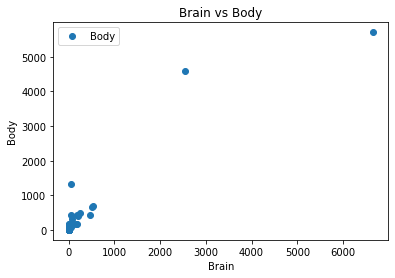

,Brain,Body,transformed
Brain,1.000000,0.934024,0.969306
Body,0.934024,1.000000,0.835410
transformed,0.969306,0.835410,1.000000


In [60]:
df1["transformed"]=np.square(df1["Brain"])
df1.plot(x='Brain', y='Body',style='o')
plt.title("Brain vs Body")
plt.xlabel("Brain")
plt.ylabel("Body")
plt.show()
df1.corr()

In [71]:
#Preparing Data for Analysis
X = df1.loc[:,['Brain']].values
y = df1.loc[:, 'Body'].values 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [72]:
y_test

array([ 12.3,   1.2,  39.2,   3.5,   6.3,  25.6,   6.6, 169. , 440. ,
         1. , 680. ,  10.8])

In [73]:
#Modelling 
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

In [74]:
print(regressor.intercept_)

104.65541741088575


In [75]:
print(regressor.coef_)

[0.96259569]


In [76]:
y_pred = regressor.predict(X_test)
print(y_pred)

[106.58060879 104.72761209 108.78302773 105.41105503 106.29183008
 107.83198319 105.6180131  258.67072774 154.86440858 104.71317315
 613.86853717 108.02450232]


In [77]:
df_1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_1)

    Actual   Predicted
0     12.3  106.580609
1      1.2  104.727612
2     39.2  108.783028
3      3.5  105.411055
4      6.3  106.291830
5     25.6  107.831983
6      6.6  105.618013
7    169.0  258.670728
8    440.0  154.864409
9      1.0  104.713173
10   680.0  613.868537
11    10.8  108.024502


In [78]:
#Metrics
from sklearn import metrics
print('R2 - SCORE:', metrics.r2_score(y_test, y_pred))

R2 - SCORE: 0.6659418322503126


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [115]:
df3 = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [116]:
df3.shape

(52, 6)

In [117]:
df3.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [118]:
df3.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [119]:
Q3 = df3.Year.quantile(0.75)
Q1 = df3.Year.quantile(0.25)

iqr = Q3 - Q1
upper_limit = Q3 + (1.5*iqr)
lower_limit = Q1 - (1.5*iqr)

print(lower_limit)
print(upper_limit)

-9.0
23.0


In [120]:
df3.YSdeg.quantile(0.75)
df3.YSdeg.quantile(0.25)

IQR = df3.YSdeg.quantile(0.75) - df3.YSdeg.quantile(0.25)
Upper_limit = df.YSdeg.quantile(0.75) + (1.5*IQR)
Lower_limit = df.YSdeg.quantile(0.25) - (1.5*IQR)

print(Upper_limit)
print(Lower_limit)

48.0
-18.0


In [121]:
df3=df3.drop_duplicates()

In [122]:
df3.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [123]:
import matplotlib.pyplot as plt

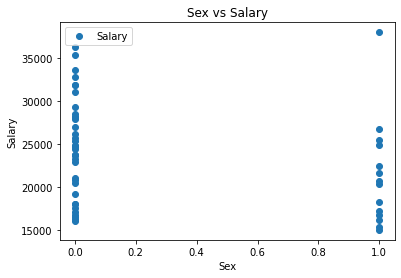

In [124]:
df3.plot(x='Sex', y='Salary', style='o')
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()

In [125]:
df3[['Sex','Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


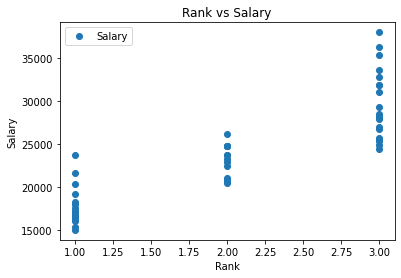

In [126]:
df3.plot(x='Rank', y='Salary', style='o')
plt.title('Rank vs Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()

In [127]:
df3[['Year','Salary']].corr()

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


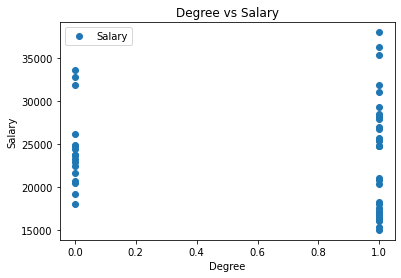

In [128]:
df3['trnasDeg']=np.power(df['Degree'],0.5)
df.plot(x='Degree', y='Salary', style='o')
plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()

In [129]:
df3[['Degree','Salary']].corr()

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


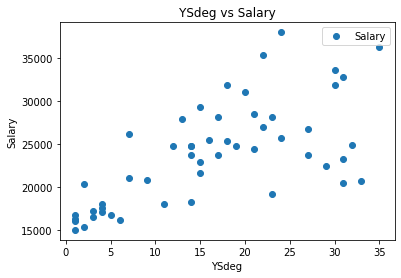

In [130]:
df3.plot(x='YSdeg', y='Salary', style='o')
plt.title('YSdeg vs Salary')
plt.xlabel('YSdeg')
plt.ylabel('Salary')
plt.show()

In [131]:
df3[['YSdeg','Salary']].corr()

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [132]:
#Split Data
X = df3[['Sex', 'Rank', 'Year', 'YSdeg']].values
y = df3[['Salary']].values

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [134]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data

In [135]:
#Model Training
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [136]:
regressor.coef_

array([[-181.4112984 , 3944.56730249, 2281.83618744, -557.54702453]])

In [137]:
regressor.intercept_

array([24378.70731707])

In [138]:
y_pred=regressor.predict(X_test_scaled)
print(y_pred)

[[27785.83681184]
 [16552.620084  ]
 [16677.25160413]
 [17375.12703607]
 [17224.32536879]
 [19381.98952699]
 [28993.95022626]
 [16975.06232854]
 [27338.6047587 ]
 [24419.50519505]
 [17954.90990119]]


In [139]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))  

R2- SCORE: 0.7557236870379114


In [140]:
y_pred1=regressor.predict([[0, 1, 20, 15]])
print(y_pred1)

[[65596.79300046]]


In [141]:
y_pred1=regressor.predict([[1, 1, 20, 15]])
print(y_pred1)

[[65415.38170206]]


As the difference between the Salary earned by Male and Female is not large, it can be concluded that Sex is not a factor in Salary.